<h1 style="color:MediumSeaGreen;">Welcome to the testing page!</h1>

<h1 style="color:MediumSeaGreen;">Objectives</h1>

- Test the properties of the extension
- See which files can I append to it
- Change themes of Jupyter Lab according to the issues in ZenHub


In [1]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
from ipywidgets import Layout

<h1 style="color:Orange;">Copied part of notebook:</h1>

<h1 style="color:MediumSeaGreen;">Classical physics</h1>

Physics aims to understand how nature works. All of the successful physical theories that we have been developed before the 1920s, are now grouped under an umbrella called "classical physics". Classical physics has two main components: classical (Newtonian) mechanics and electromagnetism. At the heart of classical mechanics is the concept of a *particle*, which has some properties, e.g. it has a mass, it obeys Newton's laws, etc. On the other hand, at the heart of electromagnetism is the concept of a *wave*, which possesses certain properties like an amplitude and a frequency. Together, classical mechanics and electromagnetism explain most of the phenomena that we regularly observe. For example, the movements and collisions of billiard balls are well explained by classical mechanics; heat and temperature can be explained in terms of the motion of atoms: the faster atoms move, the higher their temperature. On the other hand, *light*, which allows us to see and without which there would be no life on earth, is nothing but an electromagnetic wave.

So, what led to the development of quantum mechanics? 

It turns out that, towards the end of the nineteenth century, some experimental physicists produced observations which *could not* be explained by classical physics! At the dawn of the twentieth century, the number of such experiments kept increasing. It was clear that a new theory was needed to make sense of these experiments.<br/>

We will not describe all of these experiments, but just one of them, which captures the main novel features of the quantum world. The experiment is commonly known as the "double-slit experiment". Before we dive into it, let's summarize two important concepts from classical physics:

1. <font color='b64c35' size=3.5>Particle</font>
    - A particle is a localized object which has a definite mass. Other properties include, volume, density, etc. 
    - The state of a particle is described by its position and momentum. Given position and momentum, Newton's laws describe the motion of the particle.
2. <font color='b64c35' size=3.5>Wave</font>
    - A wave is a non-local phenomenon, often seen as a 'disturbance' in a field. 
    - A wave is characterized by its amplitude, frequency, etc.
    - A wave can be physically caused by the motion of particles, but it is the *collective* motion of all the particles that gives rise to a wave, not the individual motion of a particle. See for example the following picture. 

<img src="images/animation.gif" height="350" width="400" />

Try focusing your eyes on a single particle (it might help to choose a particle that is close a vertical line). Can you see that the particle is just moving up and down vertically, but is *not* moving *at all* horizontally? 
    



<h1 style="color:MediumSeaGreen;">Single qubit states</h1>

Just like classical bits, quantum bits or qubits can be in one of the two states 0 and 1.

What differentiates a qubit from a bit is that a qubit is a *quantum system*, and the state of qubit is a *quantum state*: not only can the state of a qubit be 0 or 1, but it can be in a *superposition* of the 0 state and the 1 state. The states 0 and 1, in the case of qubits, are represented by:
- $\left|0\right\rangle$ (pronounced "ket 0") and
-  $\left|1\right\rangle$ ("ket 1"). <br/>

This funky looking notation, $\left|0\right\rangle$ and $\left|1\right\rangle$, is called Dirac notation and is the standard notation to represent quantum state in quantum mechanics.
    
The most general state of a qubit is represented as:

$$\begin{align}\left| \psi \right\rangle=\alpha \left| 0 \right\rangle+\beta \left| 1 \right\rangle \end{align} \label{general_state}\tag{1}$$

where $\alpha$ and $\beta$ are complex numbers. This is a more precise way to describe superposition than "both 0 and 1 at the same time," which is often used to describe this concept. This state, as a superposition of $\left|0\right\rangle$ and $\left|1\right\rangle$, is the combination of exactly "$\alpha$ amount of $\left|0\right\rangle$" and "$\beta$ amount of $\left|1\right\rangle$." We will interpret this very soon.

<font size=3 color=b64c35> *The following section will make a lot of use of the Linear Algebra concepts from Module 3: Background Math. It might be helpful to keep that subsection open as a reference!*</font>

From above, we learn that the state of a qubit could be described by two complex numbers. What is interesting is that you can make a vector out of these two complex numbers. So, mathematically, the state of a qubit $\left|\psi \right \rangle$ is a 2-dimensional vector with complex entries, and we can represent it as:

$$\left|\psi\right\rangle = \begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix} $$

Notice that, in vector notation, 
- $\left | 0 \right> = 1 \cdot \left | 0 \right> + 0 \cdot \left | 1 \right> = \begin{bmatrix}
1\\
0
\end{bmatrix}$, and
- $\left | 0 \right> = 0 \cdot \left | 0 \right> + 1 \cdot \left | 1 \right> = \begin{bmatrix}
0\\
1
\end{bmatrix}$.

In other words, the quantum states $\left | 0 \right>$ and $\left | 1 \right>$ coincide with the unit vectors $\begin{bmatrix}
1\\
0
\end{bmatrix}$ and $\begin{bmatrix}
0\\
1
\end{bmatrix}$ respectively, and any quantum state can be written as a *linear combination* of these two.
 
The two complex values, $\alpha$ and $\beta$, uniquely define where a particular qubit state sits between $\left|0\right\rangle$ and $\left|1\right\rangle$. The only additional requirement that $\alpha$ and $\beta$ must satisfy, in order for them to define a valid qubit state, is the equality $|\alpha|^2 + |\beta|^2 = 1$, i.e. the quantum state vector has norm $1$ (we will tell you more about this shortly). We refer to $\alpha$ and $\beta$ as *amplitudes*. 

Now, that you understand how to define the state of the qubit, let's try to represent the state in python.

A qubit is a $2$-dimensional quantum system, but in general, a quantum system can be $n$-dimensional for any positive integer $n$. However, for the purpose of computational tasks, it is convenient to use qubits as building blocks just like we use bits for classical computing. It would of course be possible to rewrite classical computing in terms of, say, *ternary* strings (i.e. strings of $0,1,2$'s), as opposed to binary strings, but by convention (and for convenience) classical programs manipulate strings of bits. Likewise, in the case of quantum computing, quantum circuits (which we will discuss in the next module) manipulate sets of qubits.

<h1 style="color:Orange;">For the following code, I had to install the numpy module:</h1>

In [2]:
# import math and numpy
import math, numpy
# Let's define the amplitude for the quantum state.
a = 1/math.sqrt(2)
b = 1/math.sqrt(2)
# Now the quantum state can be defined as:
psi = numpy.array([a,b])
print(psi)

[0.70710678 0.70710678]


<h1 style="color:Orange;">The following are implementations of widgets that could prove useful:</h1>

In [3]:
def runCode():
    print(psi)

In [4]:
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        return runCode()

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

In [5]:
widgets.IntSlider()

IntSlider(value=0)

In [6]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

In [7]:
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)

Checkbox(value=False, description='Check me')

In [8]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [9]:

widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

In [10]:
accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()])
accordion.set_title(0, 'Slider')
accordion.set_title(1, 'Text')
accordion

Accordion(children=(IntSlider(value=0), Text(value='')), _titles={'0': 'Slider', '1': 'Text'})

In [11]:
play = widgets.Play(
#     interval=10,
    value=50,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

<h3 style="color:MediumSeaGreen;"> Representing images</h3>

For images, we go through a similar procedure of deciding how to encode informationa about an image into strings of 0s and 1's. At a granular level, each image is divided into a rectangular grid and each tiny square has a color (the finer the grid, the higher is the definition of the image). It is a fact that each color can be produced by combining just three colors: red, blue and green. Thus, for each tiny square in the grid, the information about its color is stored in three integers representing the intensities of the colors red, blue, and green (in turn these three integers can be stored in binary). So, when you take a picture with a 12 megapixel camera, you are actually storing values of red, blue and green for each of the 12 million pixels. In essence, you are storing 12*3*10^6 numbers for each picture. The following code snippet shows how to get these numbers behind the scenes: 

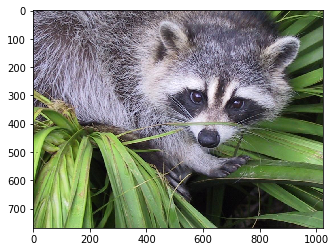

In [12]:
# The package scipy contains sample pictures in the misc folder that can be imported.
from scipy import misc
# we import matplotlib which helps in showing the pictures. The "as plt" part means that we will call it plt when we invoke it later.
import matplotlib.pyplot as plt
# we import numpy to manipulate matrices
import numpy as np
# import the module copy to copy variables.
import copy
# assign the matrix of numbers that represent the image to a variable. 
f = misc.face()
# The following line shows the image in the notebook.
plt.imshow(f)
f_shape = np.shape(f)

In [13]:
def runImage():
    #The following line shows the matrix of numbers that represents the picture.
    #Note the nubers are between 0 and 255. These represent different colors
    print(f)

In [14]:
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        return runImage()

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

From the examples given above, you should be able to convince yourself that it is indeed possible to represent all of the digital information that we routinely encounter on our phones, on the internet etc. using just bits (sufficiently many of them). However, you may still wonder: "doesn't all of this require a huge number of bits? And how many transistors can we store on a microchip anyway?"

<div class="alert alert-block alert-info">
It is indeed remarkable that the jungle of information that surrounds us is nothing but 0s and 1s. The reason that this is possible in practice is that we can fit more than a billion tiny transistors on a single computer chip, and do more than a billion operations in a single second on 64 of them. <br /> Stretch out your hand and look at any of your nails. Its area is comparable to the area of the A13 bionic chips (these are used on an iPhone 11 pro), which houses 8.5 billion transistors. You can try to imagine building and arranging these tiny transistors on such a small area and having precise control over all of them. If this was new information for you, we hope you have gained a deeper appreciation for the digital world around you. Just the simple act of taking a photo on your phone requires a marvelous synchronous dance of billions of these transistors, billions of times. If you are using an iPhone, then the dance was synchronized by software engineers at Apple. The code they write is used by billions of people around the globe. <br /> We hope that the knowledge you gain in this course will inspire you to, one day, make amazing products and services that will be used by a large number of people.
</div>
    
If you now suddenly think that digital computation is cool, wait for quantum! Before that, let's wrap up our discussion about digital computation.

So far we have talked about storing information in bits, but we also need to process them. This information processing  could range from the simple task of adding two numbers to something more complex, such as applying an Instagram filter to one a picture. At this point you should be able to guess that applying a filter to a picture amounts to nothing more than altering the values of the colors of each pixel according to some rule. We demonstrate this to you in the code snippet that follows.

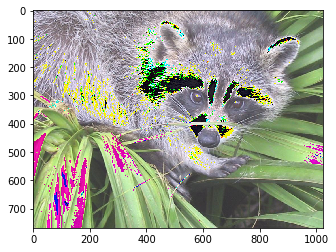

In [15]:
# As we discussed above, the numbers represent the colors of pixels. So, let's just play
# with these numbers and add 50 to each number in the matrix
x_filter = 50*np.ones(np.shape(f),dtype='uint8')
# type(x_filter)
f1 = f+x_filter
#plt.show()
plt.imshow(f1)

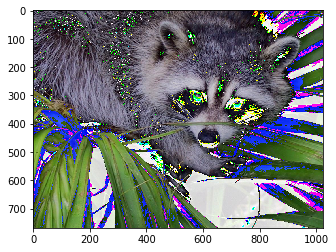

In [16]:
# Now we subtract 50 from each number in the matrix and see what happens.
f2 = f-x_filter
plt.show()
plt.imshow(f2)

In [17]:
def run():        # global variables are taken and changed, but the button only returns the print statement, no return
    f = misc.face()
    plt.imshow(f)
    f_shape = np.shape(f)
    print(4)


In [18]:
button = widgets.Button(description="Click Me!", layout=Layout(width='30%', height='40px'))
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print(2)
        return run() # does not draw plt methods, but handles changes inside function and print statements

button.on_click(on_button_clicked)  # put function here and everyting will run, but no button click needed

Button(description='Click Me!', layout=Layout(height='40px', width='30%'), style=ButtonStyle())

Output()

<h1 style="color:Orange;">Flexbox and Layout codes:</h1>

In [19]:
from ipywidgets import Layout, Button, Box

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='50%')

words = ['correct', 'horse', 'battery', 'staple']
items = [Button(description=word, layout=items_layout, button_style='danger') for word in words]
box = Box(children=items, layout=box_layout)
box

Box(children=(Button(button_style='danger', description='correct', layout=Layout(width='auto'), style=ButtonSt…

In [20]:
from IPython.display import HTML

pystartlife = str(100)  # create variable as string
HTML("<div id='textid'>" + pystartlife + "</div>")  # save the variable as div 

In [21]:
%%javascript

var startlife = document.getElementById('textid').innerHTML;  // recover div

function User() {
this.name = '';
this.life = Number(startlife);                               // transform recovered string to int
this.giveLife = function giveLife(targetPlayer) {
targetPlayer.life += 1;
this.life -= 1;
 }
}

var Alfred = new User();                                     // javascript objects created
var Wallace = new User();


Alfred.name = 'Alfred';
Wallace.name = 'Wallace';

Alfred.giveLife(Wallace);
alert('Alfred_life="' + Wallace.life + '";');

<IPython.core.display.Javascript object>

<h1 style="color:Orange;">Hover experimentation:</h1>

In [22]:
widgets.Button(description='Button', width='10%', tooltip='This is the hover') # put mouse on the button

Button(description='Button', style=ButtonStyle(), tooltip='This is the hover')

<h1 style="color:Orange;">Really cool Hover code using Dartmouth courses:</h1>

In [23]:
# Now this has hover on every item!
items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='50%')

words = ['BIOL11', 'COSC10', 'WRIT2', 'MATH3']
explanations = ['Biology 11: Emerging Infectious Diseases', 'Computer Science 10: Object Oriented Programming', \
                'Writing 2: Composition and Research I', 'Mathematics 3: Calculus']

items = [Button(description=word, layout=items_layout, button_style='danger', tooltip=explanations[words.index(word)]) \
         for word in words]
box = Box(children=items, layout=box_layout)
box

Box(children=(Button(button_style='danger', description='BIOL11', layout=Layout(width='auto'), style=ButtonSty…

You should not click the [Special word]( "This is the hover, and it can be personalized") or you will open this extension again, but you can place the mouse on it to see the hover.